In [1]:
!pip install spacy
!pip install wordcloud

In [5]:
import numpy as np
import pandas as pd
import string 
import spacy 
from matplotlib.pyplot import imread 
import  matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [4]:
import pandas 
book=pd.read_csv('apple.txt',error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [6]:
book=[x.strip() for x in book.x]
book=[x for x in book if x]
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [9]:
##part of speech 
#nlp=spacy.load('en')
nlp=spacy.load('en_core_web_sm')
one_block=book[2]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [10]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [13]:
for token in doc_block[0:20]:
    print(token,token.pos_)


Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [14]:
#Filtering for nouns and verbs
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[5:25])

['go', 'windows', 'term', 'love', 'battery', 'life', 'look', '😍', 'talking', 'app', 'store', 'monthAfter', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'use']


In [18]:
#counting token again
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['word','count']

wf_df[0:10]



,word,count
0,office,3
1,want,2
2,battery,2
3,store,2
4,have,2
5,install,2
6,version,2
7,file,2
8,play,2
9,60k,1


<AxesSubplot:title={'center':'Top verbs an nouns'}, xlabel='word'>

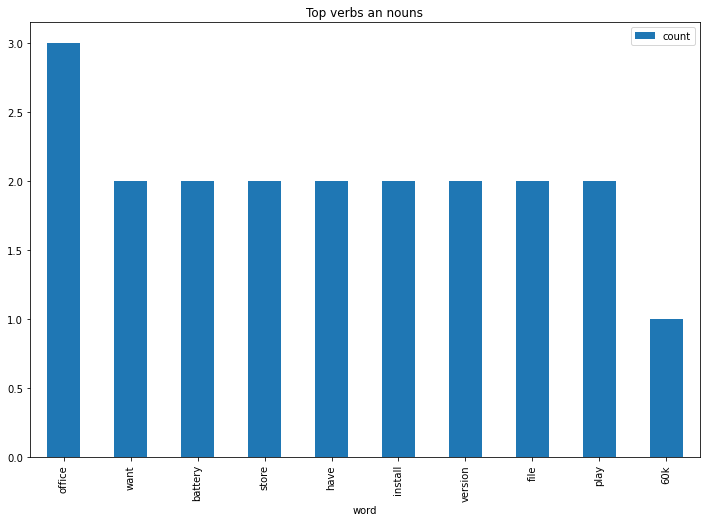

In [19]:
#visulizing 
wf_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top verbs an nouns')

Emotion mining

In [20]:
#SENTIMENT ANALYSIS
afinn=pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')
afinn.shape

(2477, 2)

In [22]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [23]:
import numpy as np
import pandas as pd
import string 
import spacy 
from matplotlib.pyplot import imread 
import  matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import pandas 
book=pd.read_csv('apple.txt',error_bad_lines=False)
book=[x.strip() for x in book.x]
book=[x for x in book if x]


b'Skipping line 6: expected 1 fields, saw 14\n'


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(''.join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [26]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
159,"Coming to the performance, the speed of this i..."
160,You can get one of the best movie experiences ...
161,Overall I would it a 4.5/5.I got a great deal ...
162,I got it not only on discount but also was abl...


In [28]:
affinity_scores=afinn.set_index('word')['value'].to_dict()

In [29]:
#custom function :score each word in a sentence in lemmatised form
#but calculate the whole original sentence 
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
            return sent_score

In [30]:
#test that it works
calculate_sentiment(text='amazing')

4

In [31]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [32]:
#how many words are in the sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    16
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [33]:
sent_df['sentiment_value'].describe()

count    164.000000
mean       0.036585
std        0.584989
min       -3.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: sentiment_value, dtype: float64

In [34]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,0,16
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,0,31
4,Problems will be there if you are switching fr...,-2,65
5,"), all printers are not compatible (e.g.",0,7


In [ ]:
sent_df.sort_values(by='sentimen')